In [41]:
# XGBoost
import numpy as np
from sklearn import svm
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import roc_auc_score,confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import xgboost

In [6]:
# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [7]:
data1 = np.load("./sample_data.npy")
data2 = np.load("./sample_data_2.npy")

In [8]:
data = np.append(data1, data2, axis=0)

In [9]:
X = data[:,1:]
y = [ 1 if i > 3 else 0 for i in data[:,0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print("Num Malignant In Total: %d, %f" % (np.sum(y), np.sum(y)/len(y)))
print("Num Malignant In Train: %d, %f" % (np.sum(y_train), np.sum(y_train)/len(y_train)))
print("Num Malignant In Test: %d, %f" % (np.sum(y_test), np.sum(y_test)/len(y_test)))

Num Malignant In Total: 310, 0.284404
Num Malignant In Train: 267, 0.288337
Num Malignant In Test: 43, 0.262195


In [10]:
X_train.shape

(926, 1033)

In [11]:
xgbclassifier = xgboost.XGBClassifier(verbose=True)
xgbclassifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbose=True)

In [14]:
y_score = xgbclassifier.predict_proba(X_test)[:,1]
y_pred = xgbclassifier.predict(X_test)
evaluate(y_test, y_pred, y_score)

F1-Score: 0.518519
ROC-Score: 0.824620
Confusion Matrix:

 Predicted    0   1  All
True                   
0          104  17  121
1           22  21   43
All        126  38  164


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [42]:
# SVM Classifiers
#classifier = svm.SVC(kernel='linear', C=0.1, probability=True)
#classifier = svm.LinearSVC(dual=True, C=0.1)

# Stochastic Gradient Descent Classifiers
#classifier = linear_model.SGDClassifier(class_weight="balanced", max_iter=25)
#classifier = linear_model.SGDClassifier(loss="log", class_weight="balanced", max_iter=25)
#classifier = linear_model.SGDClassifier(loss="modified_huber", class_weight="balanced", max_iter=25)

# Ensemble Classifiers
#classifier = ensemble.RandomForestClassifier(n_estimators=100, max_depth=3)
#classifier = ensemble.ExtraTreesClassifier(n_estimators=100, max_depth=3)
#classifier = ensemble.AdaBoostClassifier(n_estimators=100)

classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [43]:
scoring_op = getattr(classifier, "predict_proba", None)
if callable(scoring_op):
    y_score = classifier.predict_proba(X_test)[:,1]
else:
    y_score = classifier.decision_function(X_test)

y_pred = classifier.predict(X_test)
evaluate(y_test, y_pred, y_score)

F1-Score: 0.000000
ROC-Score: 0.500000
Confusion Matrix:

 Predicted    0  All
True               
0          121  121
1           43   43
All        164  164


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix:
```
TP | FP
-------
FN | TN
```

In [21]:
def evaluate(y_test, y_pred, y_score):
    print("F1-Score: %f" % f1_score(y_test, y_pred))
    print("ROC-Score: %f" % roc_auc_score(y_test,y_score))
    print("Confusion Matrix:\n\n",pd.crosstab(pd.Series(y_test), pd.Series(y_pred), rownames=['True'], colnames=['Predicted'],margins=True))

## Show TP/FN

FN: 0


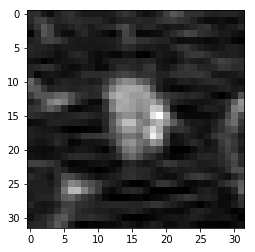

TP: 0.519846


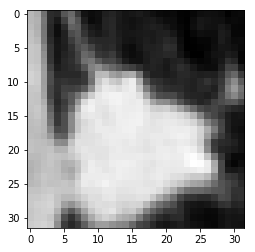

FN: 0


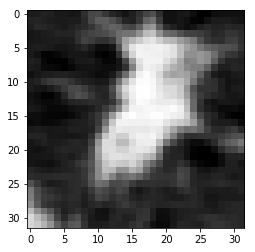

FN: 0


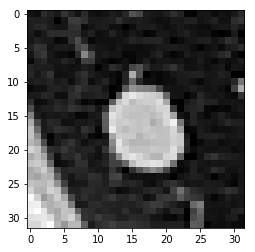

FN: 0


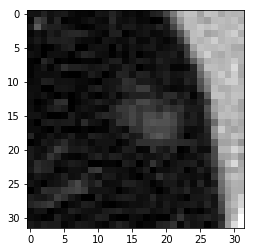

FN: 0


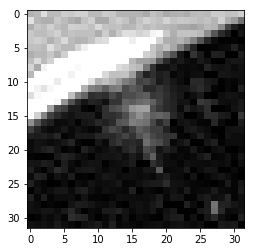

FN: 0


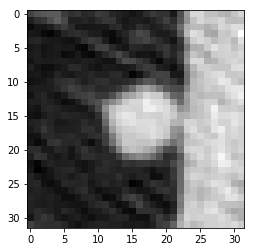

TP: 0.654013


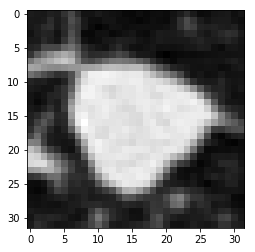

FN: 0


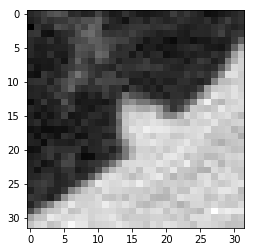

FN: 0


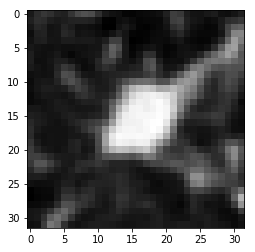

FN: 0


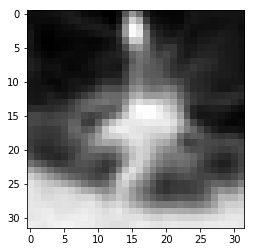

TP: 0.681967


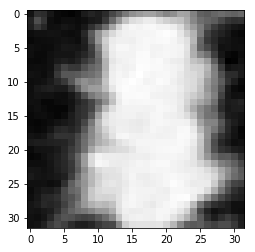

TP: 0.567240


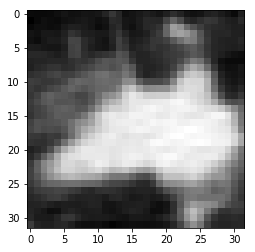

TP: 0.664273


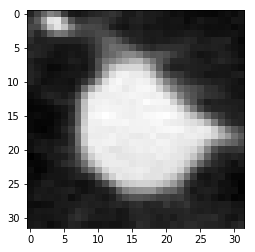

TP: 0.608349


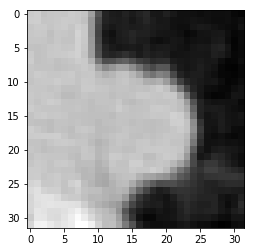

TP: 0.580096


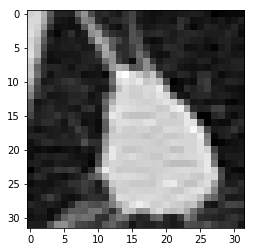

FN: 0


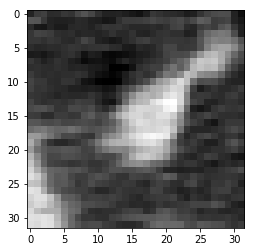

TP: 0.624393


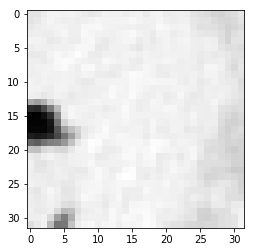

FN: 0


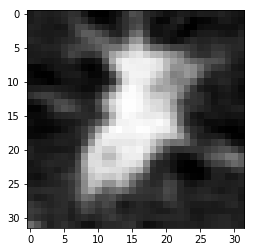

FN: 0


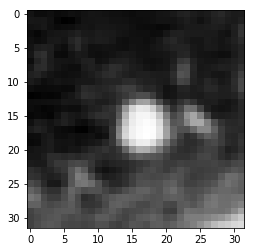

TP: 0.601953


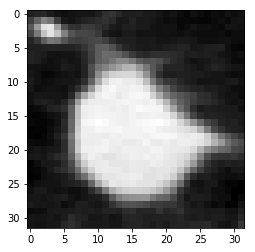

FN: 0


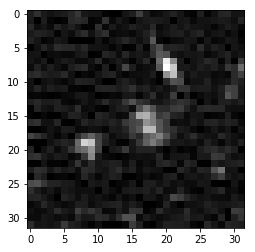

FN: 0


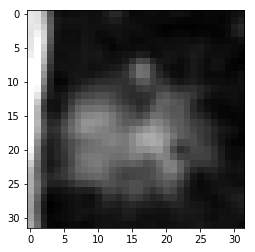

FN: 0


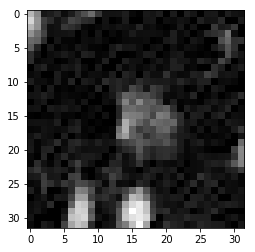

FN: 0


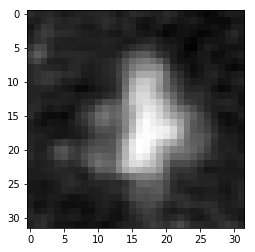

TP: 0.665331


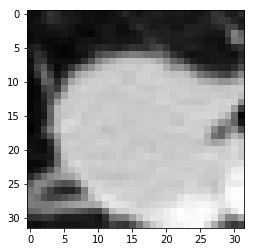

TP: 0.684519


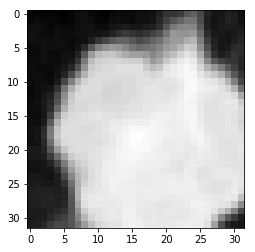

FN: 0


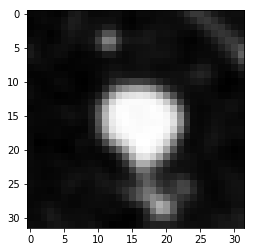

TP: 0.625575


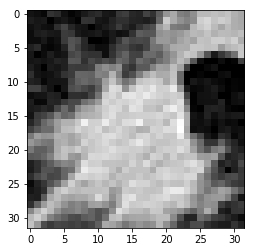

TP: 0.509744


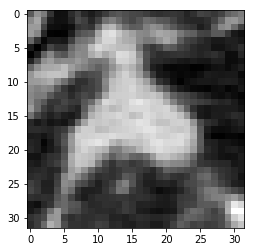

TP: 0.627416


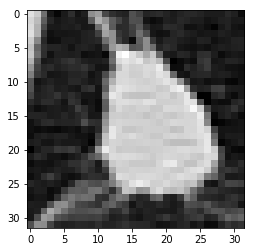

TP: 0.566754


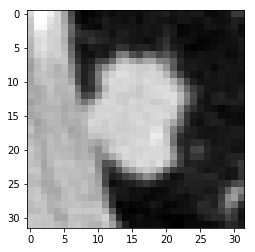

FN: 0


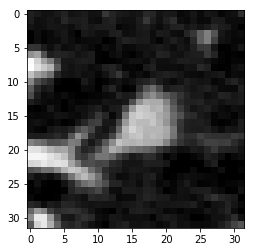

FN: 0


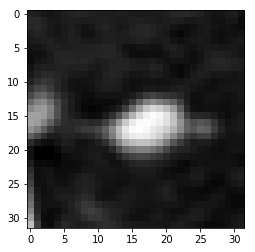

FN: 0


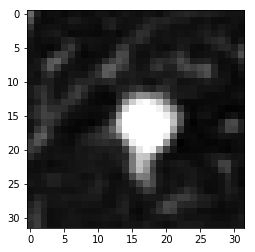

TP: 0.539147


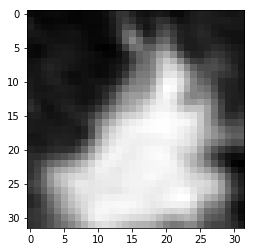

TP: 0.599504


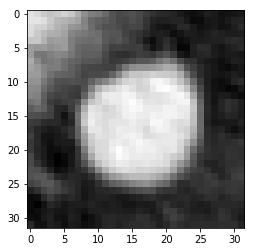

FN: 0


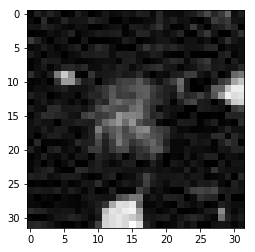

FN: 0


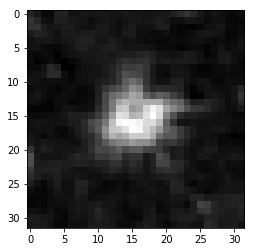

FN: 0


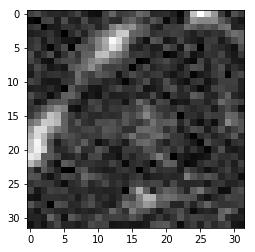

FN: 0


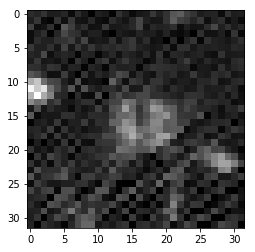

TP: 0.656299


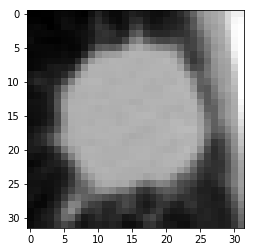

FN: 0


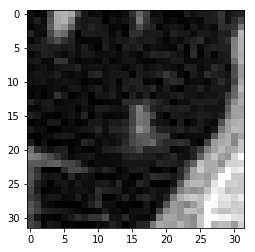

In [22]:
for i,pred in enumerate(y_pred):
    if pred == 1 and y_test[i] == 1:
        print("TP: %f" % y_score[i])
        img = X_test[i][9:].reshape((32,32))
        plt.imshow(img, cmap='gray')
        plt.show()
    if pred == 0 and y_test[i] == 1:
        print("FN: %d" % y_score[i])
        img = X_test[i][9:].reshape((32,32))
        plt.imshow(img, cmap='gray')
        plt.show()

